Anotações importantes

yr_renovated = 0 irei considerar como casas que nunca foram reformadas. 
Assumirei que o número 33 (valor único) é um erro de digitação, pois não faz sentido devido ao tamanho da casa. Transformarei esse valor em 3. 

estatística descritiva foi utilizada para verificar possiveis valores errados e dar uma visão geral dos dados


# 0.0 Importar pacotes

In [111]:
import pandas as pd

import numpy as np

import plotly.express as px

from matplotlib import pyplot as plt

import seaborn as sns

from matplotlib import gridspec

import matplotlib.ticker as mtick

from datetime import datetime

import warnings


## Funções Auxiliares

In [112]:
pd.options.display.float_format = '{:.2f}'.format
    

plt.rcParams['figure.figsize'] = (11,7)

warnings.filterwarnings('ignore')

# 1.0 Dados

## 1.1 Importando dataset

In [3]:
df = pd.read_csv('dataset/kc_house_data.csv')

## 1.2 Dimensão dos dados

In [4]:
print('Número de linha:', df.shape[0])

print('Número de colunas:', df.shape[1])

Número de linha: 21613
Número de colunas: 21


## 1.3 Tipos de variáveis

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4 Alterando os tipos de variáveis

In [6]:
df['date'] = pd.to_datetime(df['date']) #transformando para o formato certo



## 1.5 Limpeza de dados

### 1.5.1 Check NA

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.5.2 Estatística descritiva

In [8]:
df1 = df.copy()

In [9]:
#Incluindo somente variáveis numéricas
atri_num = df1.select_dtypes(include = ['int64', 'float64'])
#deletando a coluna 'ID'
atri_num = atri_num.iloc[:, 1: ]


In [10]:
#análise descritiva
df_mean =  pd.DataFrame(atri_num.apply(np.mean)).T
df_median = pd.DataFrame(atri_num.apply(np.median)).T
df_std = pd.DataFrame(atri_num.apply(np.std)).T
df_min = pd.DataFrame(atri_num.apply(np.min)).T
df_max = pd.DataFrame(atri_num.apply(np.max)).T

#concatenando
est = pd.concat( [df_mean, df_median,  df_std, df_min, df_max ] ).T.reset_index()

#alterando o nome das colunas
est.columns = [ 'atributos','media', 'mediana', 'std', 'min', 'max']

est

,atributos,media,mediana,std,min,max
0,price,540088.14,450000.00,367118.70,75000.00,7700000.00
1,bedrooms,3.37,3.00,0.93,0.00,33.00
2,bathrooms,2.11,2.25,0.77,0.00,8.00
3,sqft_living,2079.90,1910.00,918.42,290.00,13540.00
4,sqft_lot,15106.97,7618.00,41419.55,520.00,1651359.00
5,floors,1.49,1.50,0.54,1.00,3.50
6,waterfront,0.01,0.00,0.09,0.00,1.00
7,view,0.23,0.00,0.77,0.00,4.00
8,condition,3.41,3.00,0.65,1.00,5.00
9,grade,7.66,7.00,1.18,1.00,13.00


In [11]:
#substituindo o valor de 33 na coluna bedrooms por 3
df.loc[(df['bedrooms'] == 33, 'bedrooms')] = 3

# 2.0 Exploração de dados

## 2.1 Insights

In [12]:
df = df.copy()

In [13]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### **H1:**   Imóveis com vista para a água são em média 30% mais caros

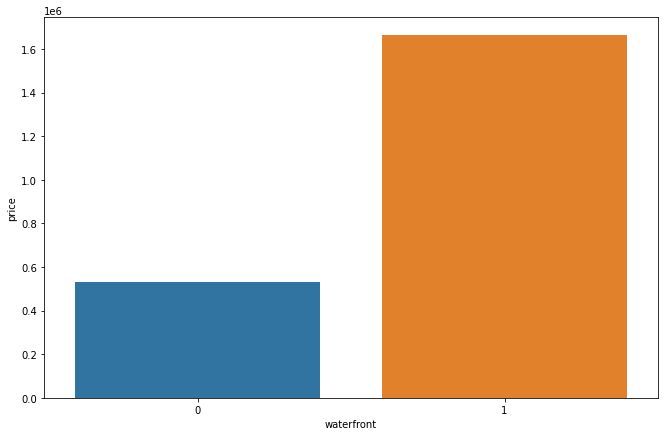

In [114]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].astype(str)

sns.barplot(h1['waterfront'], h1['price']);





### H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.


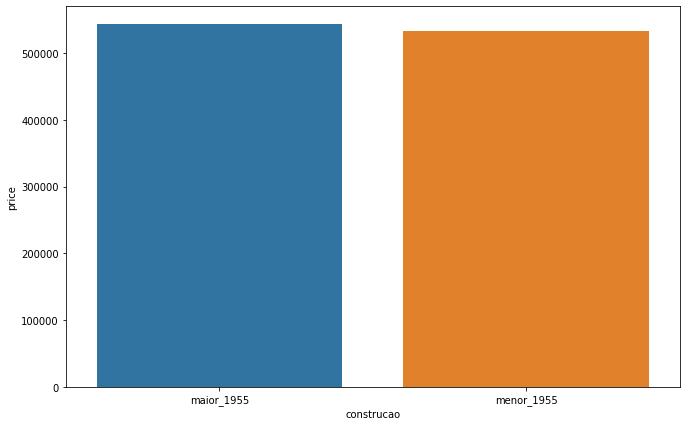

In [115]:
df1 = df.copy()

df1['construcao'] = df1['yr_built'].apply(lambda x: '> 1955' if x > 1955
                                                               else '< 1955')

h2 = df[['construcao', 'price']].groupby('construcao').mean().reset_index()

sns.barplot(yr['construcao'], yr['price']);

### H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que imóveis com 	porões.


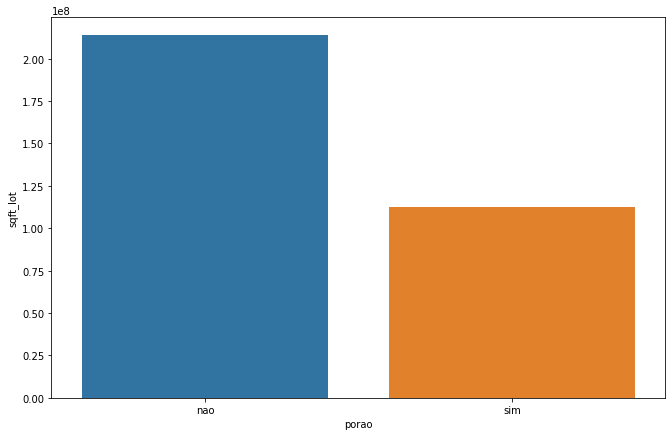

In [116]:
df['porao'] = df['sqft_basement'].apply(lambda x: 'nao' if x == 0
                                                  else 'sim')


h3 = df[['porao', 'sqft_lot']].groupby('porao').sum().reset_index()
sns.barplot(h3['porao'], h3['sqft_lot']);

### H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


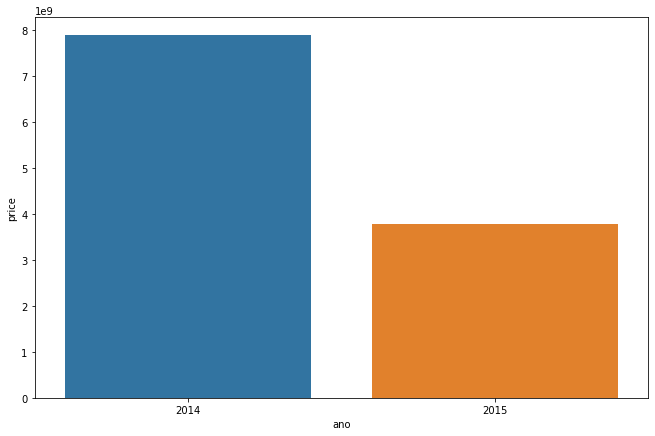

In [117]:
df['ano'] = df['date'].dt.year


h4 = df[['price', 'ano']].groupby('ano').sum().reset_index()

h4['ano'] = h4['ano'].astype(str)

sns.barplot(h4['ano'], h4['price']);

### H4.1: O crescimento do preço dos imóveis MoM é de 10%

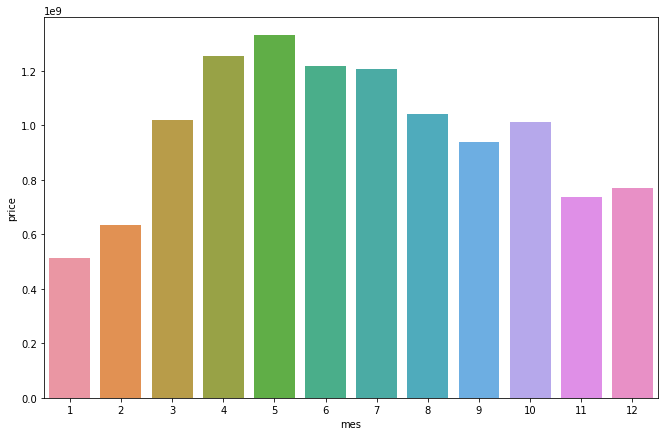

In [118]:
df['mes'] = df['date'].dt.month

h41 =  df[['mes', 'price']].groupby('mes').sum().reset_index()
#plt.bar(h41['mes'], h41['price'])


sns.barplot(h41['mes'], h41['price']);


###  H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.


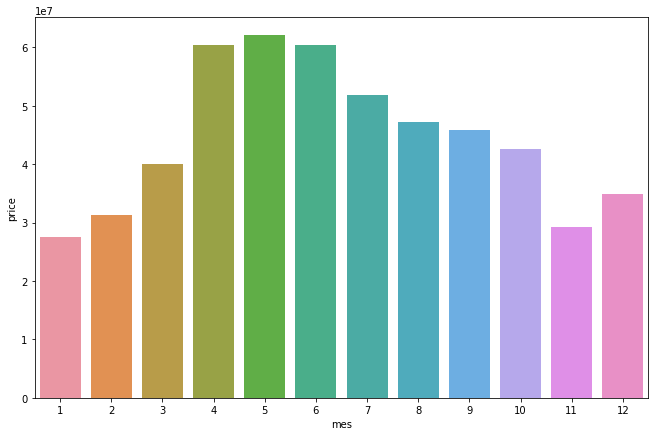

In [142]:
#df['mes'] = df['date'].dt.month

h5 = df[(df['bathrooms'] == 3)]

h5 = h5[['mes', 'price']].groupby('mes').sum().reset_index()



sns.barplot(x = h5['mes'], y = h5['price']);



### H6: Imóveis que nunca foram reformadas (yr_renovated == 0) são em média 20% mais baratos. 


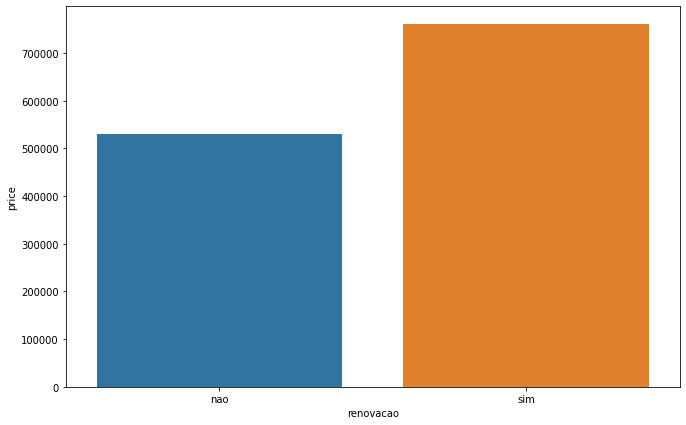

In [157]:
df['renovacao'] = df['yr_renovated'].apply(lambda x: 'sim' if x > 0 else
                                                     'nao'   )

h6 = df[['price', 'renovacao']].groupby('renovacao').mean().reset_index()

sns.barplot(h6['renovacao'], h6['price']);

### H7: Imóveis em más condições mas com boa vista (view) são 10% mais caros.


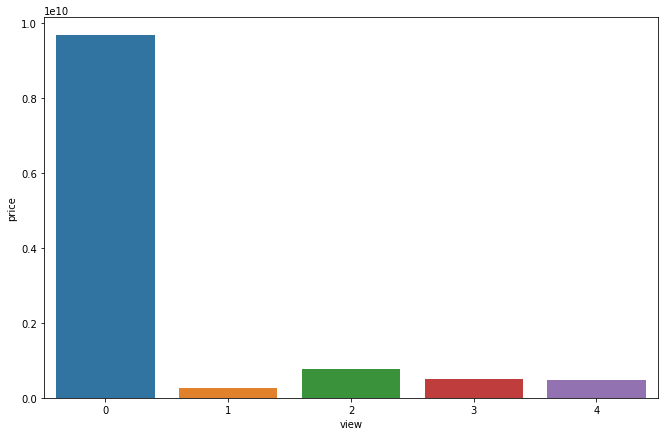

In [176]:
h71 = df[df['condition'] == 1]
h7 = df[['price', 'view']].groupby('view').sum().reset_index()

sns.barplot(h7['view'], h7['price']);


### H8: Imóveis antigos e não renovados são 40% mais baratos. 


### H9: Imóveis com mais banheiros são 5% mais caros.


### H10: Imóveis renovados recentemente são 35% mais caros.